# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [18]:
import cv2 # computer vision library
import helpers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


---
# 1. Visualize the input images


Image shape (555, 800, 3)
Selected label day


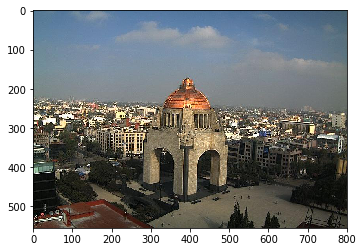

In [4]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Print out 1. The shape of the image and 2. The image's label `selected_label`
print('Image shape',selected_image.shape)
print('Selected label',selected_label)
plt.imshow(selected_image)

In [6]:
## TODO: Display a night image
# Note the differences between the day and night images
# Any measurable differences can be used to classify these images
found = False
night_image_index = 1

while not(found):
    if IMAGE_LIST[night_image_index][1] != 'night':
        night_image_index += 1
    else:
        found = True

night_image_index

120

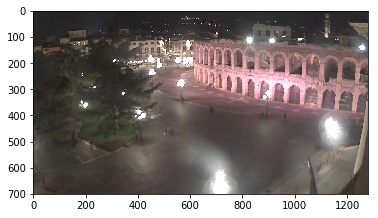

In [7]:
night_image = IMAGE_LIST[night_image_index][0]
plt.imshow(night_image)

In [10]:
# Convert from RGB to HSV
hsv_day = cv2.cvtColor(selected_image, cv2.COLOR_RGB2HSV)
hsv_night = cv2.cvtColor(night_image, cv2.COLOR_RGB2HSV)

# HSV channels for both images
h_day = hsv_day[:,:,0]
s_day = hsv_day[:,:,1]
v_day = hsv_day[:,:,2]

h_night = hsv_night[:,:,0]
s_night = hsv_night[:,:,1]
v_night = hsv_night[:,:,2]

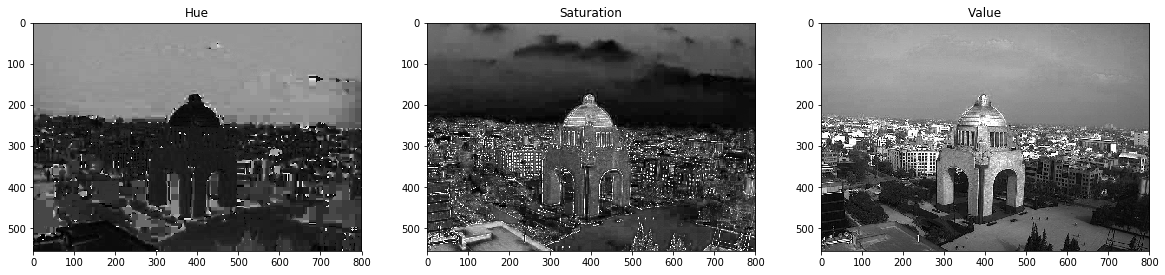

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h_day, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s_day, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v_day, cmap='gray')

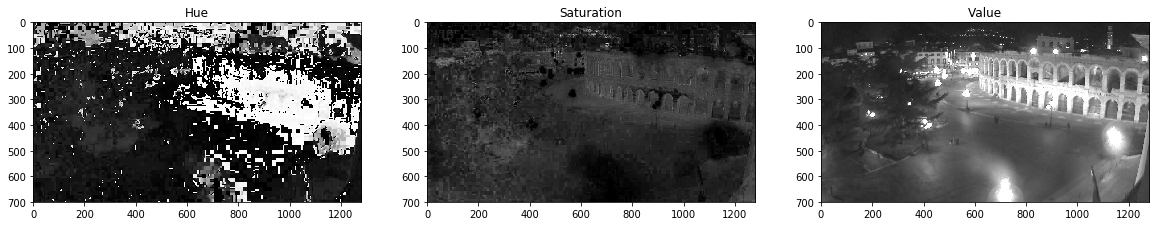

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h_night, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s_night, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v_night, cmap='gray')

In [21]:
h_night_df = pd.DataFrame(h_night)
h_day_df = pd.DataFrame(h_day)

In [39]:
# calculation of the difference in mean and median between day and night 

h_mean_diff = np.mean(h_day) - np.mean(h_night)
h_median_diff = np.median(h_day) - np.median(h_night)
s_mean_diff = np.mean(s_day) - np.mean(s_night)
s_median_diff = np.median(s_day) - np.median(s_night)
v_mean_diff = np.mean(v_day) - np.mean(v_night)
v_median_diff = np.median(v_day) - np.median(v_night)

In [40]:
h_mean_diff, h_median_diff, s_mean_diff, s_median_diff, v_mean_diff, v_median_diff

(10.385091346927283, 34.0, 25.154531823117757, 18.0, 14.364330960424709, 43.0)

In [ ]:
# I can see that average and median for hue, saturation and value the day picture is higher than compared to the night picture 